# Explore here

In [2]:
# Step 1: Loading the dataset
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Storing the raw data in the ./data/raw folder
data.to_csv("../data/raw/data.csv", index = False)

In [4]:
# Step 2: Performing a full EDA
# Information about data types and non-null values
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Dropping duplicates
data = data.drop_duplicates().reset_index(drop = True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Eliminating irrelevant information
data.drop(["region", "children"], axis = 1, inplace = True)
data.head()

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520


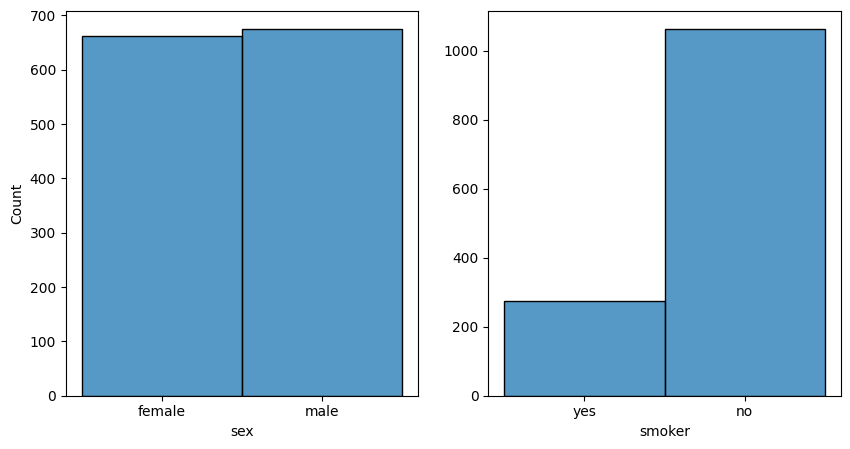

In [7]:
# Analysis of univariate (categorical) variables
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 2, figsize = (10, 5))

# Create histograms
sns.histplot(ax=axis[0], data=data, x='sex')
sns.histplot(ax=axis[1], data=data, x='smoker').set(ylabel=None)

# Show plot
plt.show()

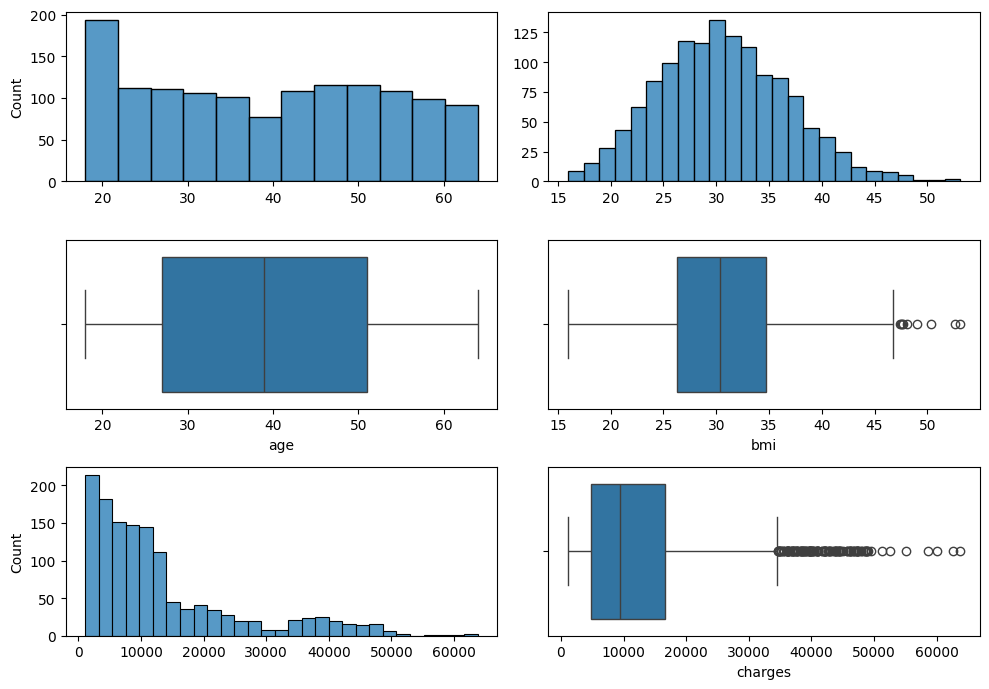

In [8]:
# Analysis on numeric variables
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = data, x = "charges").set(xlabel = None)
sns.boxplot(ax = axis[2, 1], data = data, x = "charges")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
# BMI
bmi_stats = data["bmi"].describe()
bmi_stats

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [11]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(bmi_iqr, 2)}")

The upper and lower limits for finding outliers are 47.32 and 13.67, with an interquartile range of 8.41


In [12]:
data[data["bmi"] > 50]

,age,sex,bmi,smoker,charges
846,23,male,50.38,no,2438.0552
1046,22,male,52.58,yes,44501.3982
1316,18,male,53.13,no,1163.4627


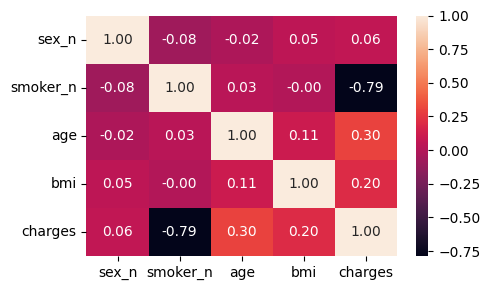

In [13]:
# Numerical-categorical analysis (complete)
# Factorizing (convert categorical values into numerical labels) values:
data["sex_n"] = pd.factorize(data["sex"])[0]
data["smoker_n"] = pd.factorize(data["smoker"])[0]

fig, axis = plt.subplots(figsize = (5, 3))

sns.heatmap(data[["sex_n", "smoker_n", "age", "bmi", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [14]:
# Feature scaling
from sklearn.model_selection import train_test_split

num_variables = ["sex_n", "smoker_n", "age", "bmi"]

# Dividing the dataset into training and test samples
X = data.drop("charges", axis = 1)[num_variables]
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sex_n,smoker_n,age,bmi
1113,1,1,23,24.510
967,1,1,21,25.745
598,0,1,52,37.525
170,1,1,63,41.470
275,0,1,47,26.600


In [15]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,sex_n,smoker_n,age,bmi
1113,1.0,1.0,0.108696,0.230024
967,1.0,1.0,0.065217,0.263250
598,0.0,1.0,0.739130,0.580172
170,1.0,1.0,0.978261,0.686306
275,0.0,1.0,0.630435,0.286252


In [16]:
# Feature selection
from sklearn.feature_selection import f_classif, SelectKBest

# Selecting the 3 best features (independant variables)
selection_model = SelectKBest(f_classif, k = 3)
selection_model.fit(X_train_scal, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,smoker_n,age,bmi
0,1.0,23.0,24.510
1,1.0,21.0,25.745
2,1.0,52.0,37.525
3,1.0,63.0,41.470
4,1.0,47.0,26.600


In [17]:
X_test_sel.head()

,smoker_n,age,bmi
0,1.0,49.0,22.515
1,1.0,29.0,25.600
2,1.0,51.0,36.385
3,0.0,31.0,34.390
4,1.0,31.0,38.390


In [18]:
X_train_sel["charges"] = list(y_train)
X_test_sel["charges"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [19]:
# Building a multiple linear regression model
# Reading the processed dataset
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,smoker_n,age,bmi,charges
0,1.0,23.0,24.510,2396.09590
1,1.0,21.0,25.745,3279.86855
2,1.0,52.0,37.525,33471.97189
3,1.0,63.0,41.470,13405.39030
4,1.0,47.0,26.600,9715.84100


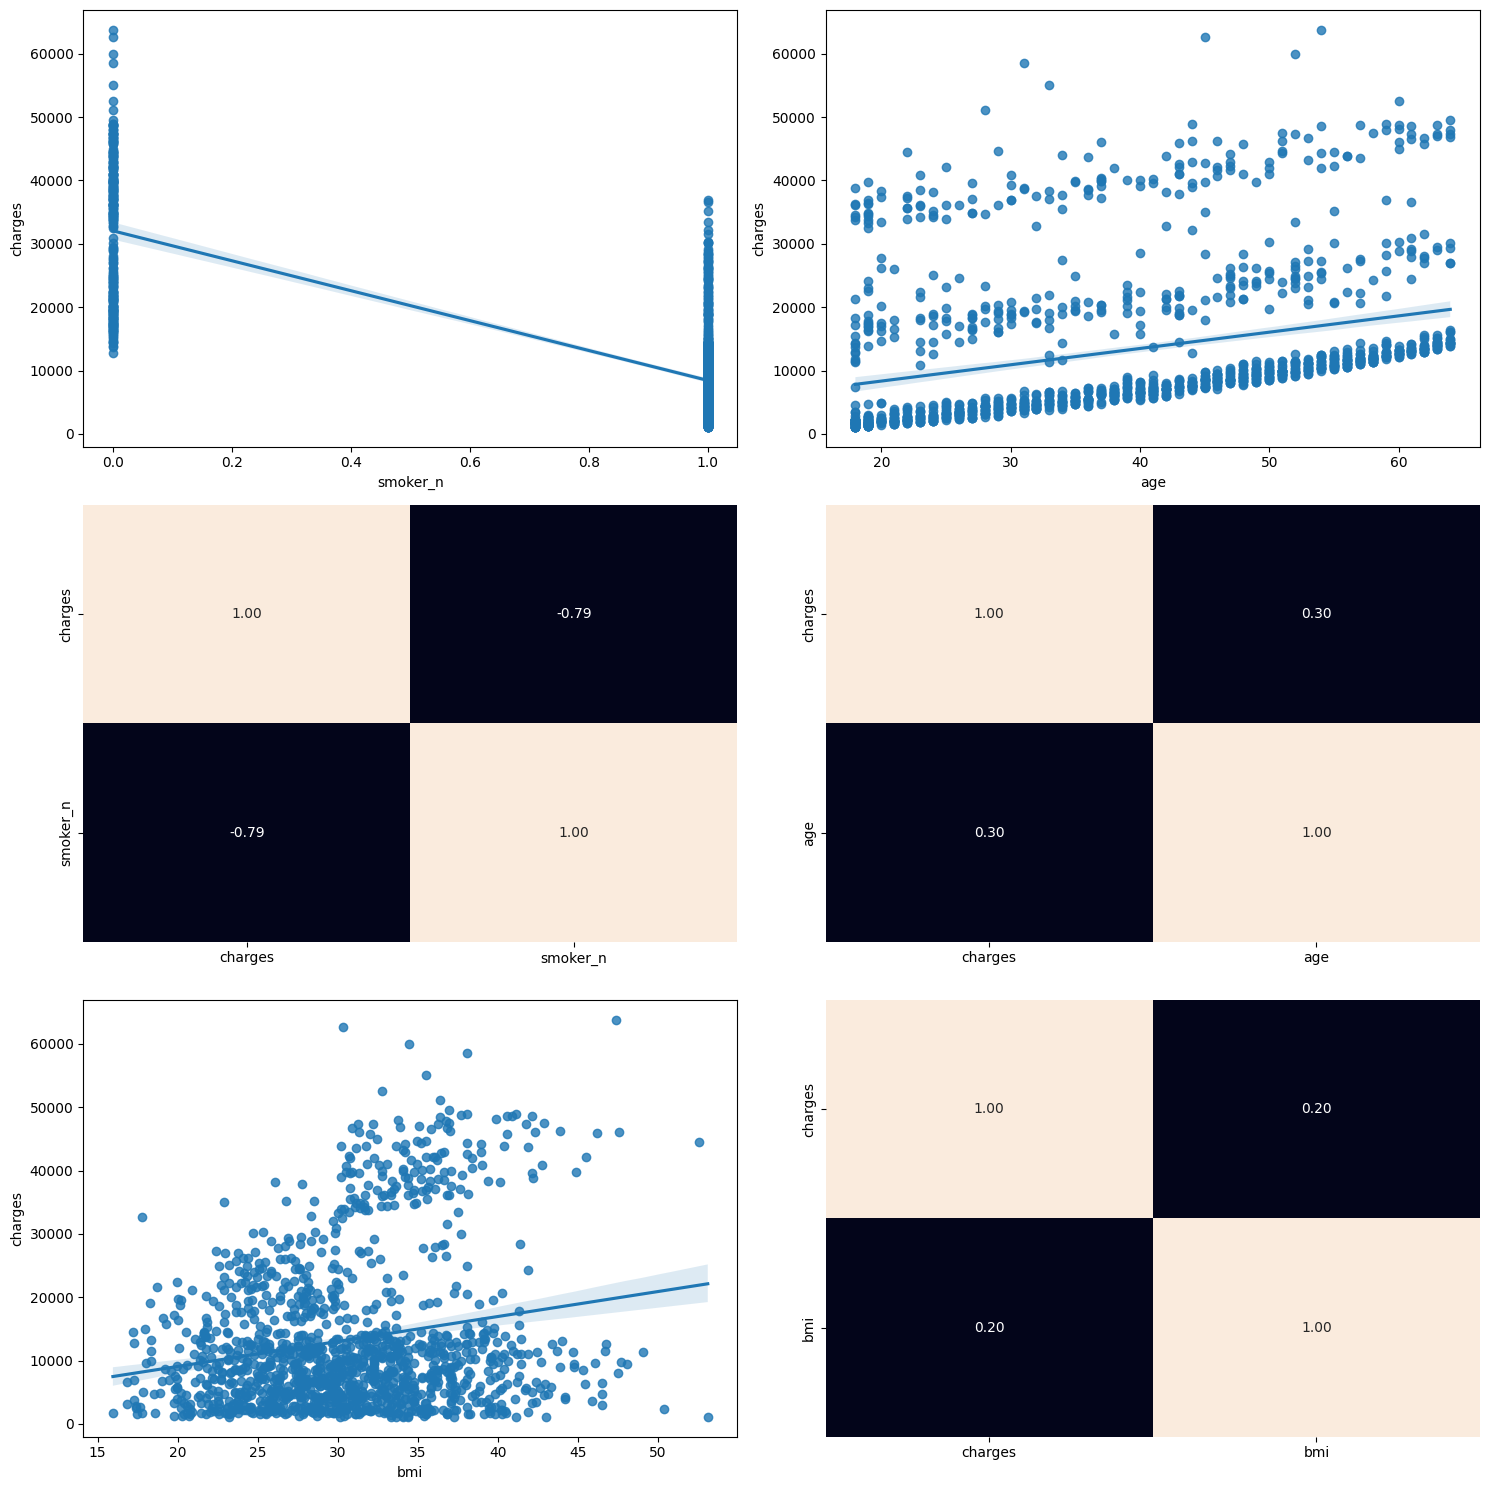

In [ ]:
# Step 3: Linear Regression(Multiple linear regression)
fig, axis = plt.subplots(3, 2, figsize = (15, 15))
total_data = pd.concat([train_data, test_data])

sns.regplot(ax = axis[0, 0], data = total_data, x = "smoker_n", y = "charges")
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.regplot(ax = axis[2, 0], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1], cbar = False)

plt.tight_layout()

plt.show()

In [21]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [22]:
# Initialization and training of the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b1, b2, b3): {model.coef_}")

Intercept (a): 12303.373906871859
Coefficients (b1, b2, b3): [-23074.26173498    251.87617725    304.80255734]


In [24]:
# Model prediction
y_pred = model.predict(X_test)
y_pred

array([ 8433.67443577,  4336.46678013, 13165.0382606 , 30593.69534864,
        8738.64384303, 13004.1887831 , 29273.63576136,  2177.09021482,
       10922.95093736, 10315.83022735, 11021.84491859, 33740.33309282,
       30613.92158231, 18004.87150727,  9656.23179762,  9311.37354392,
        4325.12010919, 32099.96630635,  3001.71338943,  5552.62898392,
        4325.12010919, 29913.00795743, 14580.01800456, 30752.45719245,
       31444.92261851,  4769.02189756, 35187.05259131, 37413.46842278,
       10952.8675722 , 12177.75978526,  6505.9651105 , 13121.95183512,
         870.87899962, 12471.87695664, 40355.37672202, 12499.04467281,
        2732.11267963,  2866.20850841, 32023.18474965,  9365.1280589 ,
        6903.0538664 , 29243.81679061, 34097.79751626, 11919.91981386,
        6896.22734444,  4145.55111435,  6040.33037213,  9173.38425823,
        4186.69945959,  8909.59778913,  6340.1295272 , 12053.6361681 ,
       30836.41015271,  4425.70495311, 10719.84316929,  9666.05445578,
      

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

Mean squared error: 35841574.81814752
Coefficient of determination: 0.8049502474643172
